DATASET [KAGGLE
](https://www.kaggle.com/datasets/mirichoi0218/insurance/data)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
sns.set(style='whitegrid',context='notebook')

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'insurance' dataset.
Path to dataset files: /kaggle/input/insurance


In [4]:
df = pd.read_csv(path+'/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.isna().sum().sum()

np.int64(0)

In [6]:
df.dtypes.value_counts()

,count
object,3
int64,2
float64,2


# CREAMOS MODELO DE REGRESIÓN LINEAL SIMPLE

In [7]:
X_cols = ['age']
y_col = ['charges']

In [8]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [9]:
X = df[X_cols].values
y = df[y_col].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [11]:
#creamos el modelo
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

# EVALUAMOS EL MODELO

In [12]:
#erro cuadratico medio
mse = metrics.mean_squared_error(y_test,y_pred)
#R2 Coeficiente de determinación
r2 = metrics.r2_score(y_test,y_pred)
print(f'El error cuadratico medio(MSE) es de {round(mse,4)}')
print(f'El coeficiente de determinación(R2) es de {round(r2,4)}')

El error cuadratico medio(MSE) es de 0.8734
El coeficiente de determinación(R2) es de 0.1266


# GRAFICAMOS VALORES REALES VS VALORES PREDECIDOS

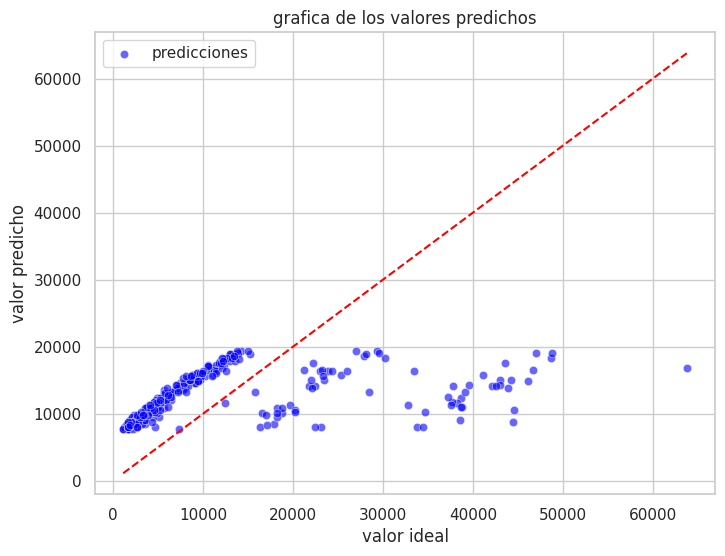

In [13]:
y_test_inv = sc_y.inverse_transform(y_test)
y_pred_inv = sc_y.inverse_transform(y_pred)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_inv.flatten(),y=y_pred_inv.flatten(),alpha=0.6,color='blue',label='predicciones')
plt.plot([min(y_test_inv),max(y_test_inv)],[min(y_test_inv),max(y_test_inv)],color='red',linestyle='--')

plt.xlabel("valor ideal")
plt.ylabel("valor predicho")
plt.title("grafica de los valores predichos")
plt.legend()
plt.show()

In [14]:
# Test the model with an age of 50
age_to_predict = np.array([[50]])

# Scale the input age using the previously fitted scaler
age_to_predict_scaled = sc_x.transform(age_to_predict)

# Make a prediction
predicted_charge_scaled = model.predict(age_to_predict_scaled)

# Inverse scale the prediction back to the original scale
predicted_charge = sc_y.inverse_transform(predicted_charge_scaled)

print(f'For an age of {age_to_predict[0][0]}, the predicted charge is: {round(predicted_charge[0][0], 2)}')

For an age of 50, the predicted charge is: 15837.33


In [15]:
import joblib
joblib.dump(model,'insurance-ml.pkl')

['insurance-ml.pkl']

In [16]:
joblib.dump(sc_x,'scaler_x.pkl')
joblib.dump(sc_y,'scaler_y.pkl')

['scaler_y.pkl']